In [76]:
#importing the necessary library to use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew, kurtosis
from scipy import stats


The task is to perform to draw insight and to perform statistical analysis on the possum data set

In [77]:
#df=pd.set_option('display.max_column',None)
#df=pd.set_option('display.max_column',1000)

                            Preliminary data analysis

In [78]:
#loading the data
df=pd.read_csv('possum.csv')
df.head(5)#checking the first six rows of the data


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [79]:
df.describe(include='all')

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104,104,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,other,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,58,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52.500000,3.625000,NaN,NaN,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,NaN,NaN,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,NaN,NaN,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,NaN,NaN,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,NaN,NaN,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,NaN,NaN,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000


In [80]:
df.tail()#checking the last 5rows of the data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


              Data cleaning

In [81]:
df.isna().sum()#checking the number of missing values in those data
#...in the data there 3 missing values all together

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

**we can do two things in the rows for the missing values.either we drop the rows or we fill the row with the mean of that column.we can use .dropna() to drop or fillna() to fill the missing value

In [82]:
df['footlgth']=df['footlgth'].fillna(df['footlgth'].mean())#we fill the missing value with mean
df['age']=df['age'].fillna(df['age'].mean())


In [83]:
df.isnull().sum()#to check again if it was replaced with the mean

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [84]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [85]:
#standardize data for any case mistyped 
#df[df['sex']==df['sex'].str.upper()]
df['sex']=df['sex'].str.upper()#changing the sex colums to upper case
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,M,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,F,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,F,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,F,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,F,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [86]:
#checking the data type for the columns
df.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [87]:
#renaming each column for clarity and putting the their individaul units
df.rename(columns={
    'hdlngth':'hd_length',
    'totlngth':'tot_length',
    'taill':'tail',
    'footlgth':'foot_length'
},inplace=True)
df.head()

,case,site,Pop,sex,age,hd_length,skullw,tot_length,tail,foot_length,earconch,eye,chest,belly
0,1,1,Vic,M,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,F,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,F,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,F,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,F,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [88]:
# Check for inconsistent categorical values
for col in ['site', 'Pop', 'sex']:
    print(f"{col}: {df[col].unique()}")

site: [1 2 3 4 5 6 7]
Pop: ['Vic' 'other']
sex: ['M' 'F']


Descriptive data analysis

In [89]:
#extracting necessary column
extract_df=df[['site','Pop','sex','hd_length','tot_length','tail','foot_length','eye']]
extract_df.head()

,site,Pop,sex,hd_length,tot_length,tail,foot_length,eye
0,1,Vic,M,94.1,89.0,36.0,74.5,15.2
1,1,Vic,F,92.5,91.5,36.5,72.5,16.0
2,1,Vic,F,94.0,95.5,39.0,75.4,15.5
3,1,Vic,F,93.2,92.0,38.0,76.1,15.2
4,1,Vic,F,91.5,85.5,36.0,71.0,15.1


Grouping the data to check for outliers

Text(0.5, 0.98, '')

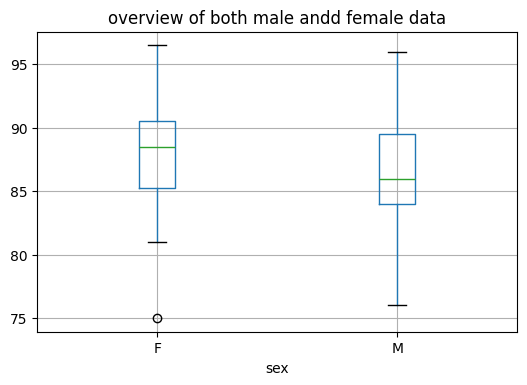

In [90]:
extract_df.boxplot(column='tot_length', by='sex', figsize=(6,4))
plt.title('overview of both male andd female data')
plt.suptitle('')

General statistical analysis

In [91]:

#select numerical and categorical columm
numerical_cols=extract_df.select_dtypes(include=['float','int64']).columns
categorical_cols=extract_df.select_dtypes(include=['object', 'category']).columns

In [92]:
#measure of centre for numerical cols
for col in numerical_cols:
    mean=extract_df[col].mean()
    median=extract_df[col].median()
    mode=extract_df[col].mode()[0]
    print(f'\n{col}:')
    print(f'Mean : {mean:.2f}')
    print(f'Median: {median:.2f}')
    print(f'Mode: {mode:.2f}')


site:
Mean : 3.62
Median: 3.00
Mode: 1.00

hd_length:
Mean : 92.60
Median: 92.80
Mode: 93.30

tot_length:
Mean : 87.09
Median: 88.00
Mode: 89.00

tail:
Mean : 37.01
Median: 37.00
Mode: 38.00

foot_length:
Mean : 68.46
Median: 68.10
Mode: 73.20

eye:
Mean : 15.05
Median: 14.90
Mode: 14.40


In [104]:
#measure of spread for numerical columns
from matplotlib.pylab import minimum

for col in numerical_cols:
    std_dev=extract_df[col].std()
    variance=extract_df[col].var()
    min_val=extract_df[col].min()
    max_val=extract_df[col].max()
    q1=extract_df[col].quantile(0.25)
    q3=extract_df[col].quantile(0.75)
    data_range = df[col].max() - df[col].min()
    iqr=stats.iqr(extract_df[col])
    kurtosis=extract_df[col].kurtosis()
    skewness=extract_df[col].skew()
    print(f'\n{col}:')
    print(f'Standard deviation: {std_dev:.2f}')
    print(f'variance: {variance:.2f}')
    print(f'Minimum: {min_val:.2f}')
    print(f'Maximum: {max_val:.2f}')
    print(f'Q1 25th percentile: {q1:.2f}')
    print(f'Q3 75th percentile: {q3:.2f}')
    print(f'data range:{data_range:.2f}')
    print(f'interquartile range: {iqr:.2f}')
    print(f'kurtosis: {kurtosis:.2f}')
    print(f'skewness: {skewness:.2f}')
    


site:
Standard deviation: 2.35
variance: 5.52
Minimum: 1.00
Maximum: 7.00
Q1 25th percentile: 1.00
Q3 75th percentile: 6.00
data range:6.00
interquartile range: 5.00
kurtosis: -1.58
skewness: 0.19

hd_length:
Standard deviation: 3.57
variance: 12.77
Minimum: 82.50
Maximum: 103.10
Q1 25th percentile: 90.67
Q3 75th percentile: 94.72
data range:20.60
interquartile range: 4.05
kurtosis: 0.89
skewness: -0.06

tot_length:
Standard deviation: 4.31
variance: 18.58
Minimum: 75.00
Maximum: 96.50
Q1 25th percentile: 84.00
Q3 75th percentile: 90.00
data range:21.50
interquartile range: 6.00
kurtosis: -0.10
skewness: -0.29

tail:
Standard deviation: 1.96
variance: 3.84
Minimum: 32.00
Maximum: 43.00
Q1 25th percentile: 35.88
Q3 75th percentile: 38.00
data range:11.00
interquartile range: 2.12
kurtosis: 0.40
skewness: 0.17

foot_length:
Standard deviation: 4.37
variance: 19.13
Minimum: 60.30
Maximum: 77.90
Q1 25th percentile: 64.65
Q3 75th percentile: 72.50
data range:17.60
interquartile range: 7.85

In [94]:
#outlier detection
for col in numerical_cols:
    Q1=extract_df[col].quantile(0.25)
    Q3=extract_df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"\n{col}:")
    print(f"  IQR Outliers: {len(outliers_iqr)} values outside [{lower_bound:.2f}, {upper_bound:.2f}]")
    


site:
  IQR Outliers: 0 values outside [-6.50, 13.50]

hd_length:
  IQR Outliers: 3 values outside [84.60, 100.80]

tot_length:
  IQR Outliers: 0 values outside [75.00, 99.00]

tail:
  IQR Outliers: 4 values outside [32.69, 41.19]

foot_length:
  IQR Outliers: 0 values outside [52.88, 84.27]

eye:
  IQR Outliers: 1 values outside [12.41, 17.71]


                   Grouped statistical analysis

In [114]:

#group by sex
sex_group=extract_df.groupby('sex')
sex_describe=sex_group[numerical_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
sex_describe.round(2)



site                            hd_length                      ...  \
     mean median   std   var min max      mean median   std    var  ...   
sex                                                                 ...   
F    2.98    2.0  2.22  4.93   1   7     92.15   92.5  2.57   6.63  ...   
M    4.08    4.0  2.35  5.51   1   7     92.92   93.2  4.13  17.03  ...   

    foot_length                       eye                                 
            std    var   min   max   mean median   std   var   min   max  
sex                                                                       
F          4.85  23.56  60.3  77.9  14.81   14.8  1.03  1.06  13.0  17.4  
M          3.98  15.86  62.0  75.0  15.21   15.0  1.04  1.08  12.8  17.8  

[2 rows x 36 columns]

In [113]:
#group by population
Pop_group=extract_df.groupby('Pop')
Pop_describe=Pop_group[numerical_cols].agg(['mean', 'median', 'std', 'var', 'min', 'max'])
Pop_describe.round(2)

site                            hd_length                      ...  \
       mean median   std   var min max      mean median   std    var  ...   
Pop                                                                   ...   
Vic    1.28    1.0  0.46  0.21   1   2     92.60  93.15  2.73   7.48  ...   
other  5.48    6.0  1.37  1.87   3   7     92.61  92.40  4.14  17.17  ...   

      foot_length                      eye                                 
              std   var   min   max   mean median   std   var   min   max  
Pop                                                                        
Vic          2.62  6.86  62.7  77.9  14.87   14.9  0.78  0.61  13.0  16.4  
other        2.77  7.67  60.3  73.2  15.18   15.0  1.21  1.47  12.8  17.8  

[2 rows x 36 columns]

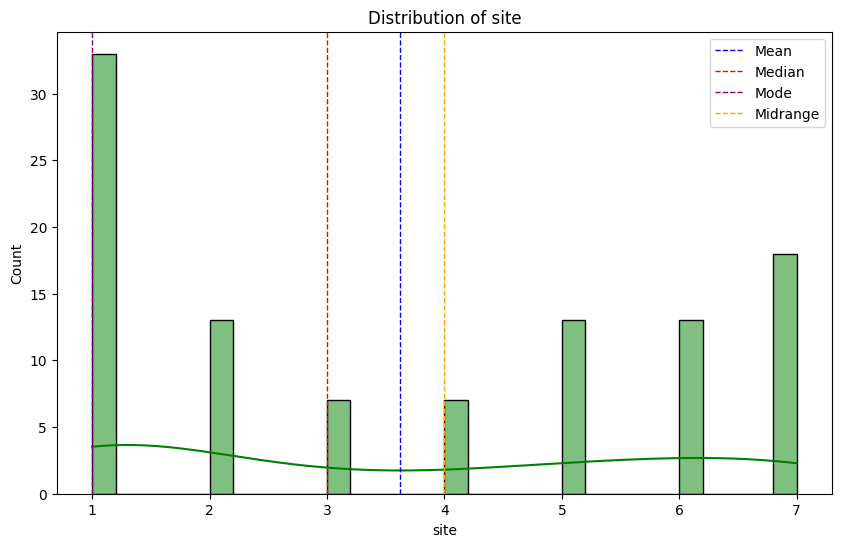

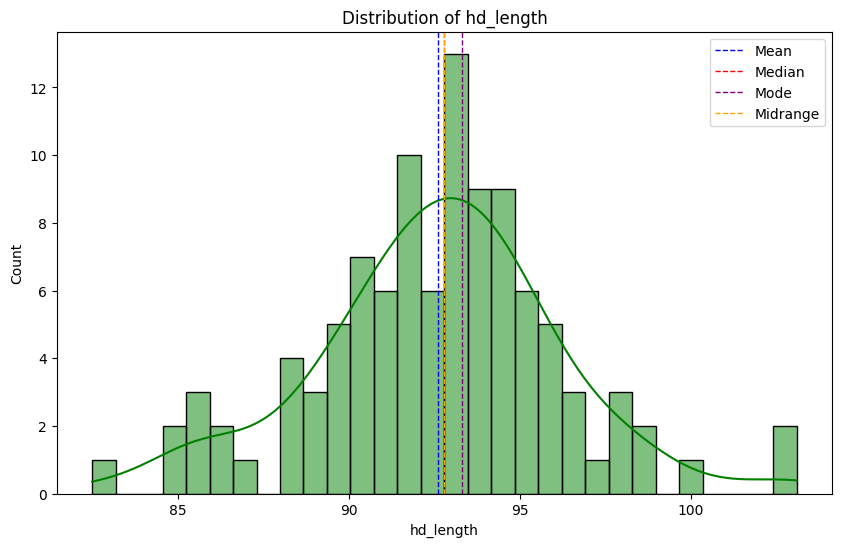

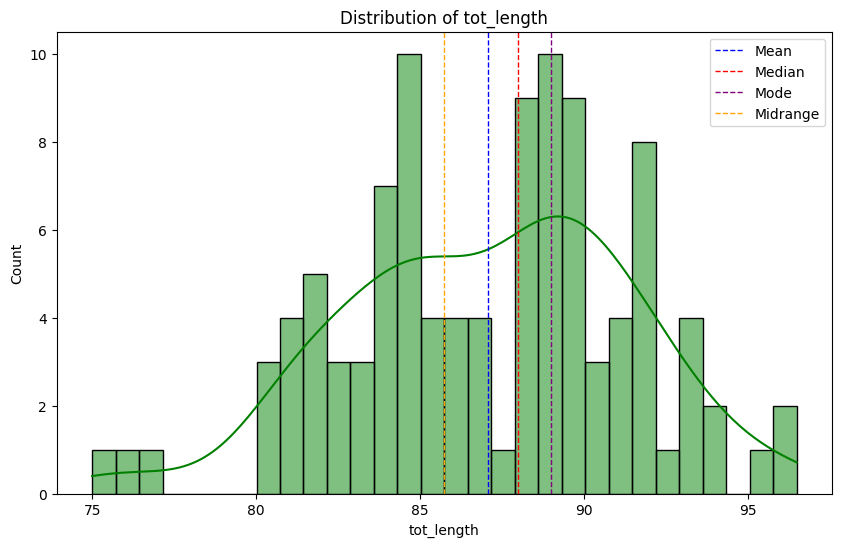

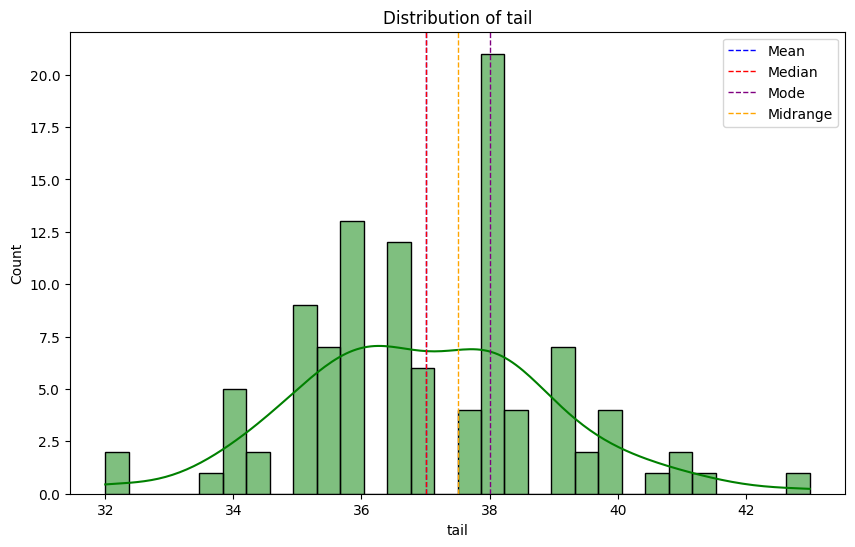

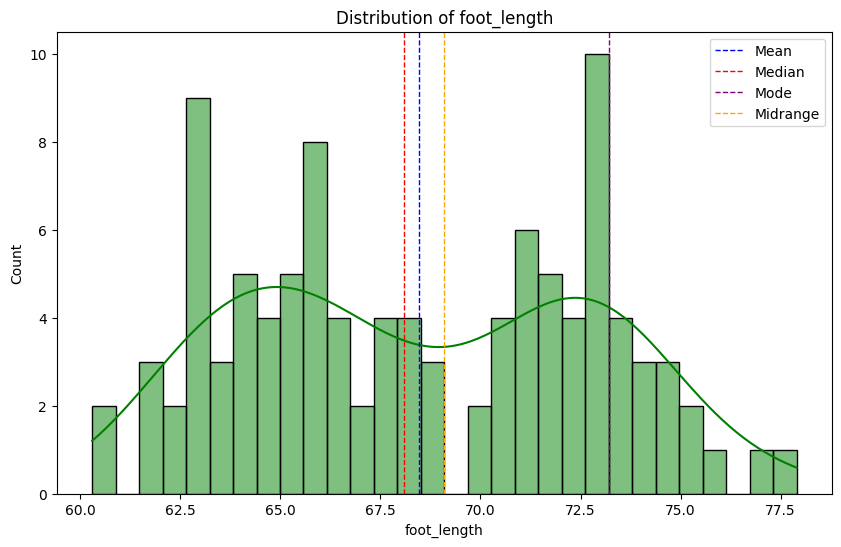

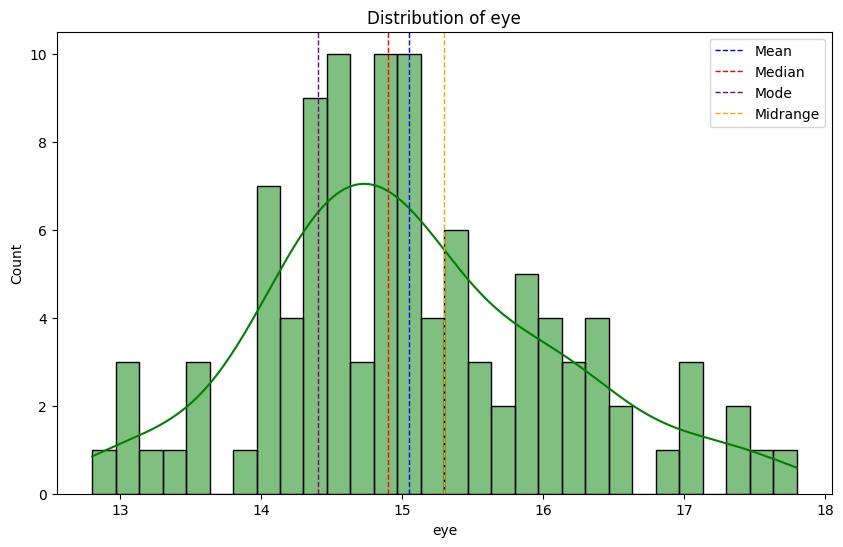

In [108]:
#Numerical columns visualization for measure of centre
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color='green', bins=30)
    plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=1, label='Median')
    plt.axvline(df[col].mode()[0], color='purple', linestyle='dashed', linewidth=1, label='Mode')
    midrange = (df[col].min() + df[col].max()) / 2
    plt.axvline(midrange, color='orange', linestyle='dashed', linewidth=1, label='Midrange')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.show()

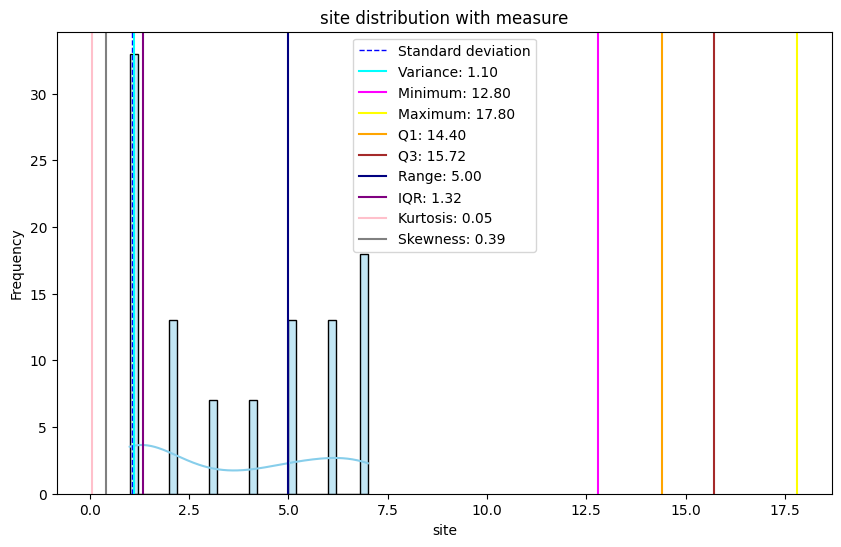

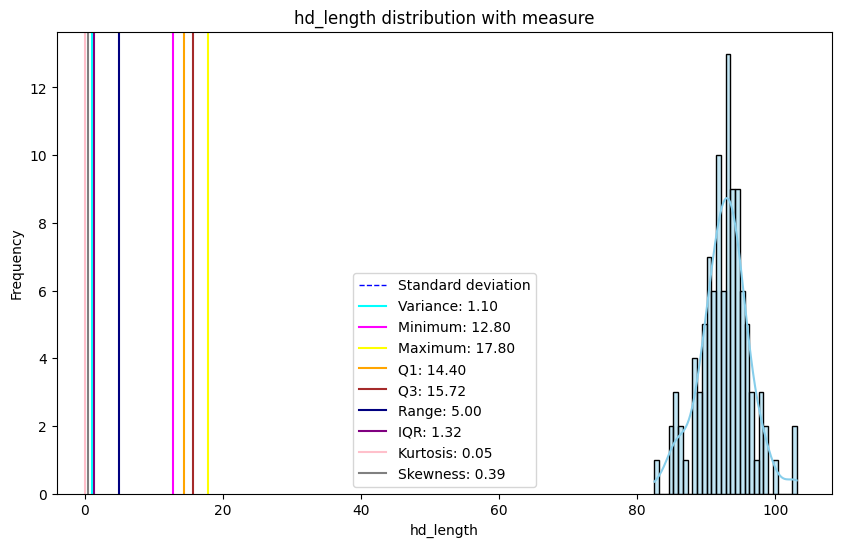

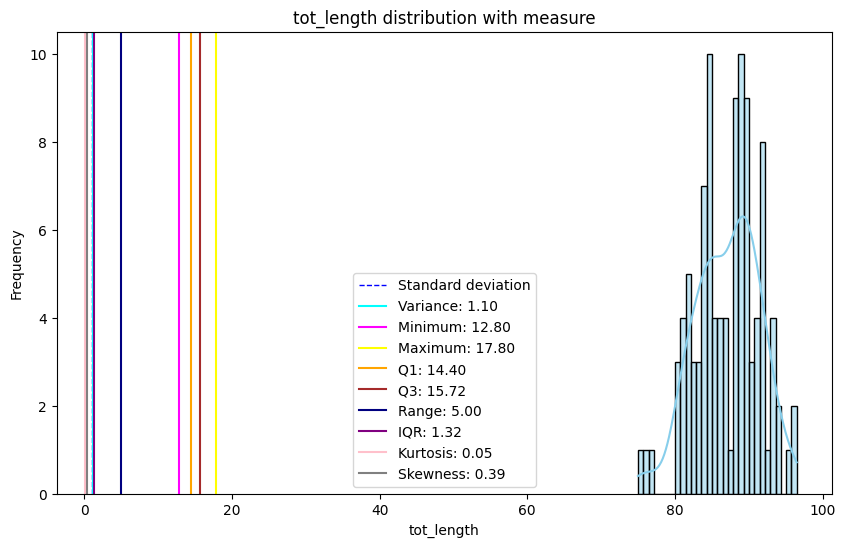

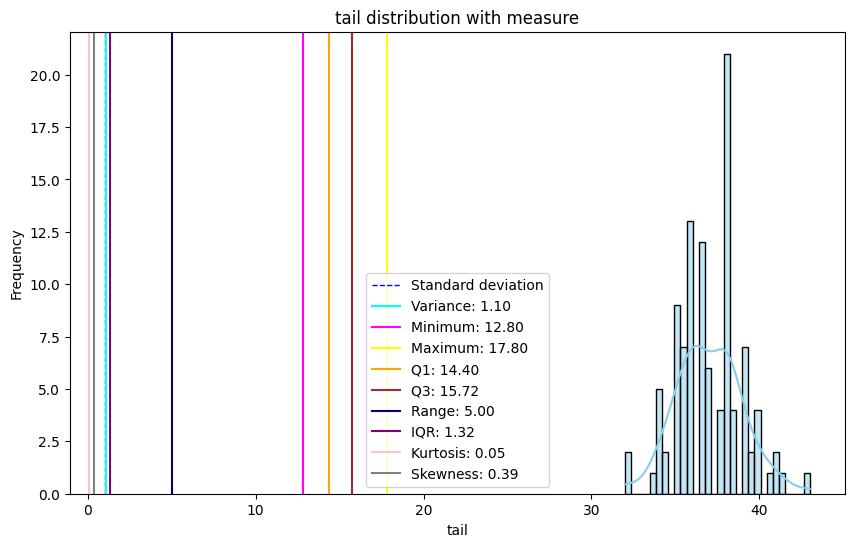

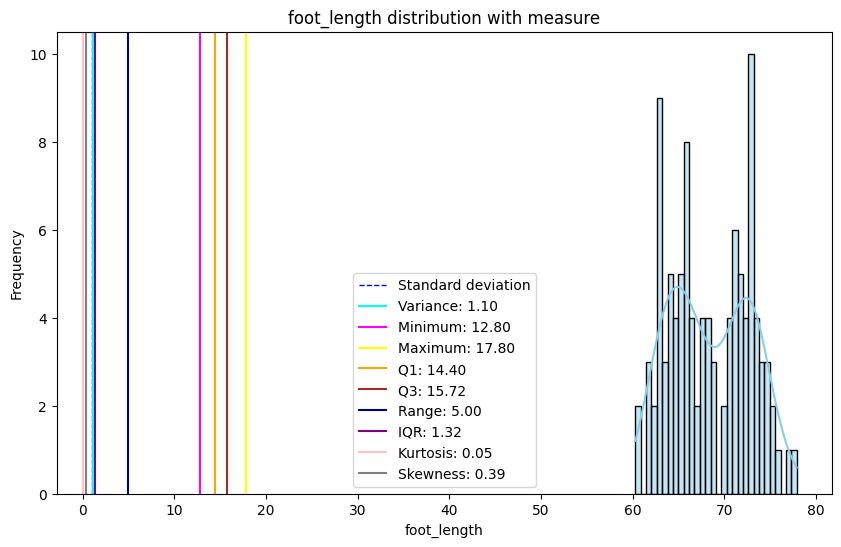

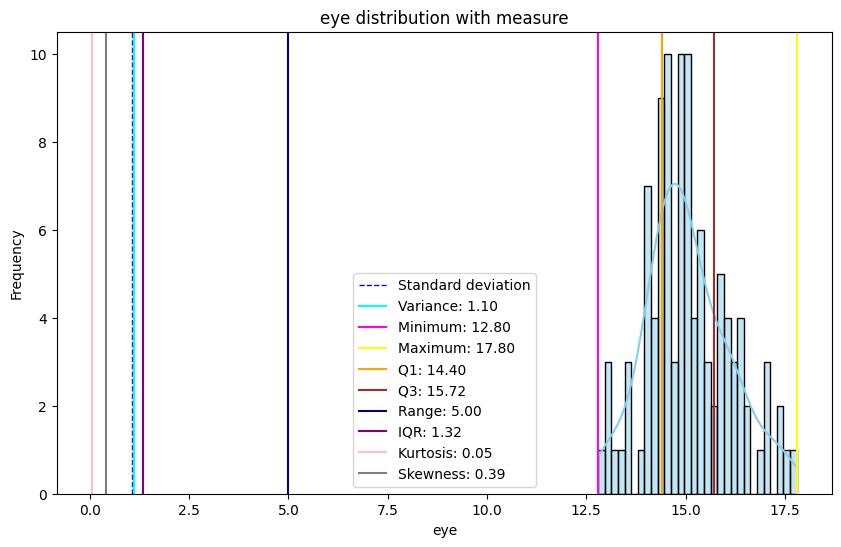

In [112]:
# Measure of spread visualization for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.axvline(std_dev, color='blue', linestyle='dashed', linewidth=1, label='Standard deviation')
    plt.axvline(variance, color='cyan', linestyle='-', label=f'Variance: {variance:.2f}')
    plt.axvline(min_val, color='magenta', linestyle='-', label=f'Minimum: {min_val:.2f}')
    plt.axvline(max_val, color='yellow', linestyle='-', label=f'Maximum: {max_val:.2f}')
    plt.axvline(q1, color='orange', linestyle='-', label=f'Q1: {q1:.2f}')
    plt.axvline(q3, color='brown', linestyle='-', label=f'Q3: {q3:.2f}')
    plt.axvline(data_range, color='navy', linestyle='-', label=f'Range: {data_range:.2f}')
    plt.axvline(iqr, color='purple', linestyle='-', label=f'IQR: {iqr:.2f}')
    plt.axvline(kurtosis, color='pink', linestyle='-', label=f'Kurtosis: {kurtosis:.2f}')
    plt.axvline(skewness, color='grey', linestyle='-', label=f'Skewness: {skewness:.2f}')
    plt.title(f'{col} distribution measure')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

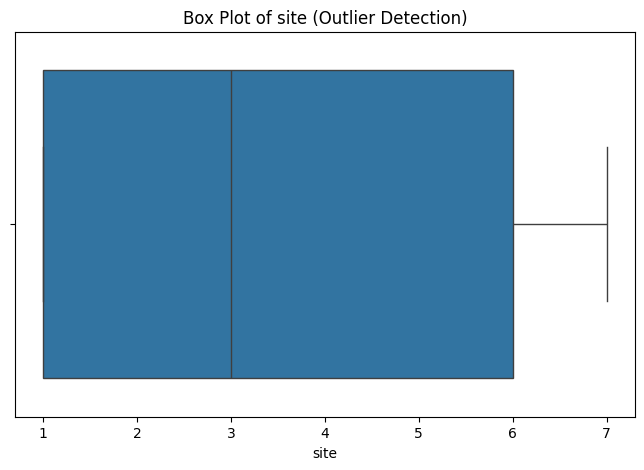

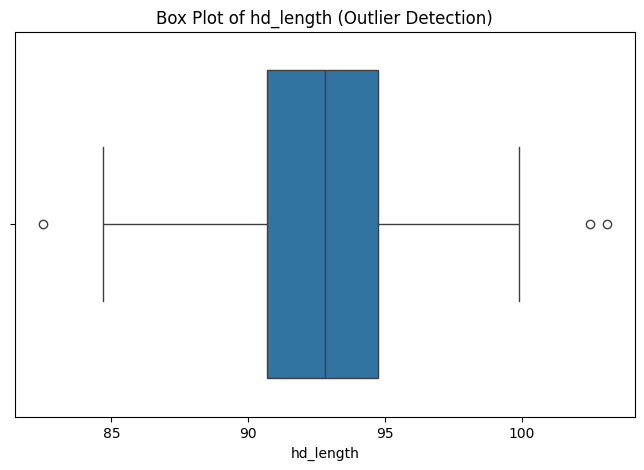

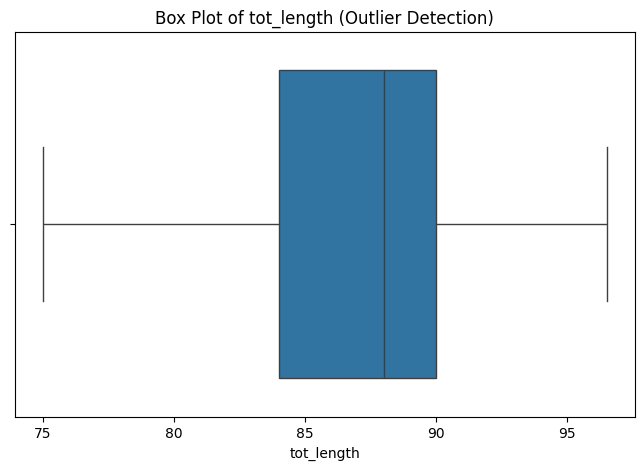

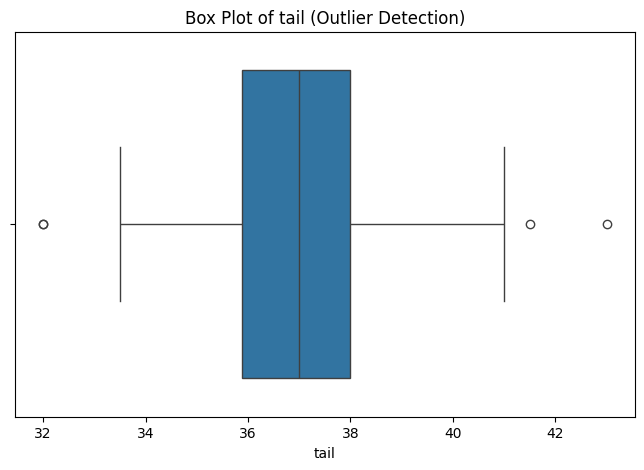

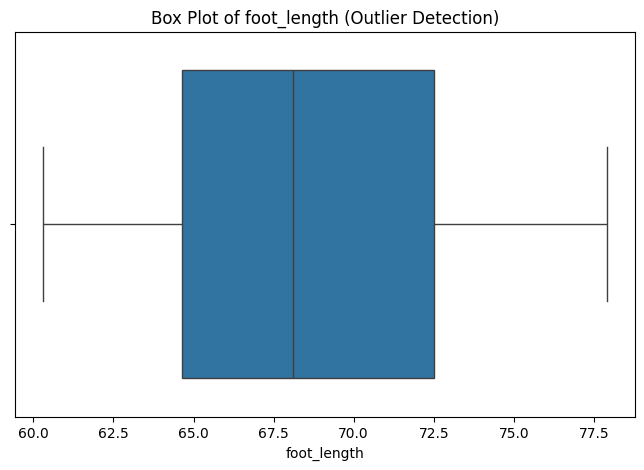

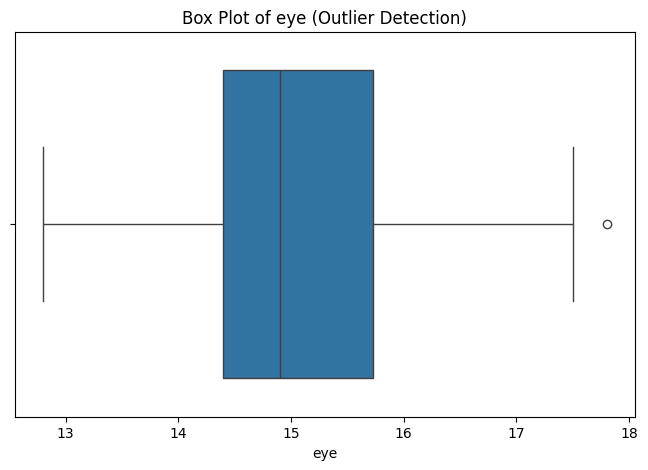

In [115]:
# Outlier detection visualization
for col in numerical_cols:    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=extract_df[col])
    plt.title(f'Box Plot of {col} (Outlier Detection)')
    plt.show()

In [118]:
# Save Cleaned Data
df.to_csv('cleaned_possum.csv', index=False)

In [123]:
extract_df=pd.read_csv('cleaned_possum.csv')
extract_df.head()

,case,site,Pop,sex,age,hd_length,skullw,tot_length,tail,foot_length,earconch,eye,chest,belly
0,1,1,Vic,M,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,F,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,F,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,F,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,F,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
